In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [3]:
filepath = '/content/gdrive/My Drive/Colab Notebooks/Assignments/As4_Exploratory Data Analysis_haberman.csv'
data = pd.read_csv(filepath)
data.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


# **Data Verification and Cleaning**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [5]:
data.status.unique() # Fidning unique class labels

array([1, 2])

In [6]:
# Mapping class labels for ease of interpretation
data.status = data.status.map({1: 'Survived', 2: 'Dead'}) 
# data.head()

In [7]:
# Number of duplicate rows
print(data[data.duplicated()].shape) 

(17, 4)


In [8]:
# Removing duplicate rows
data_unique = data.drop_duplicates(ignore_index=True) 
# data_unique.shape

In [9]:
x = data_unique[['age', 'year', 'nodes']]
y = data_unique['status']

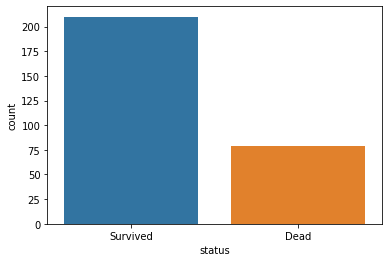

In [10]:
sns.countplot(x= data_unique.status)
plt.show()

In [11]:
data_unique.status.value_counts()

Survived    210
Dead         79
Name: status, dtype: int64

**Observations (Data Verification and Cleaning):**

1. There are NO null objects
2. There are  306 data points out of which 17 are duplicates. Hence, unique observations are 289
3. There are 3 features namely age, year (operation year) and nodes
4. Status is dependent variable (1: Survived, 0: Did not survive)
5. Data is imbalanced. Data points with status as survived are about 210 and those with Dead are 79

# **Exploratory Data Analysis**

## **1. Statistical Analysis**

In [12]:
data_unique.describe(include='all')

,age,year,nodes,status
count,289.000000,289.000000,289.000000,289
unique,NaN,NaN,NaN,2
top,NaN,NaN,NaN,Survived
freq,NaN,NaN,NaN,210
mean,52.422145,62.906574,4.221453,NaN
std,10.876915,3.275794,7.325239,NaN
min,30.000000,58.000000,0.000000,NaN
25%,44.000000,60.000000,0.000000,NaN
50%,52.000000,63.000000,1.000000,NaN
75%,60.000000,66.000000,5.000000,NaN


**Observations (Statistical Analysis):**
  
  Age:
  
    1. The mean age is 52.42 years with standard deviation of 10.87
    2. People aged above 30 are prone to breast cancer
    3. The median age (50th percentile) is 52 years close to mean value. 
    4. Therefore distribution is almost symmetrical. It could be normally distributed or uniformly distributed
    5. 50% of the observations are in the age group of 44-60 years of age(16 years)


  Year:

    1. The mean is 62.9 and standard deviation of 3.27
    2. The median is 63 almost same as the mean value. 
    3. Therefore distribution is almost symmetrical (not 100%). It could be normally distributed or uniformly distributed
    4. The observations are for the period 1958 to 1969
    5. 50% of the observations are during the years 1960 to 1966


  Nodes: 

    1. The mean is 4.22 nodes and standard deviation of 7.325
    2. The median or 50th percentile is 1 node. Meaning about 50% of obeservations have 0 or 1 node
    3. The 75th percentile is 5 nodes. Meaning about 75% of obervations have node less than or equal to 5
    4. Since mean is greater than median, the distribution is positively skewed or right skewed
    5. 50% of observations are in the range of 0-5 nodes
  
  Status:

    1. There are two unique classes. 
    2. Class 'Survived' has the highest frequency that is 210 out of 289. Thus the data is imbalanced

## **2. Univariate Analysis (PDF, CDF, Boxplot, Violinplot, Q-Q plot, KS-test, AD-test)**

### Distribution of independent features (PDF)

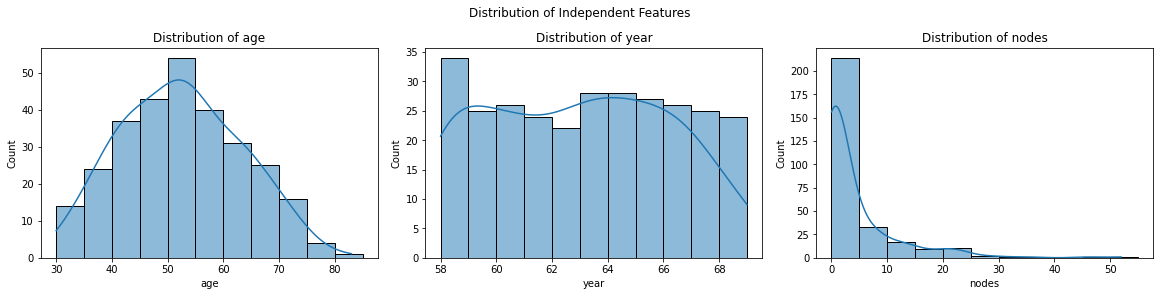

In [13]:
f, axs = plt.subplots(1,3, figsize = (16,4), constrained_layout = True)
for idx, feature in enumerate(x.columns):
    bin_width = 5
    if feature == 'year':
        bin_width = 1
    sns.histplot(data = data_unique, x = feature, ax = axs[idx], kde = True, binwidth = bin_width)\
    .set_title('Distribution of ' + feature)
f.suptitle('Distribution of Independent Features')
plt.show()

In [14]:
# Percentage of patients having nodes less than or equal to 5
print((x.nodes <= 5).sum()/len(x.nodes))

0.7612456747404844


Observations:

    1. Age approximately has normal distribution
    2. Year is kind of uniformly distributed and is between 1958 and 1969
    3. Distribution of nodes follows power-law. Hence, it has pareto distribution
    4. Nodes is highly densed from 0 to 5. (About 76% of observations)

### Q-Q Plot

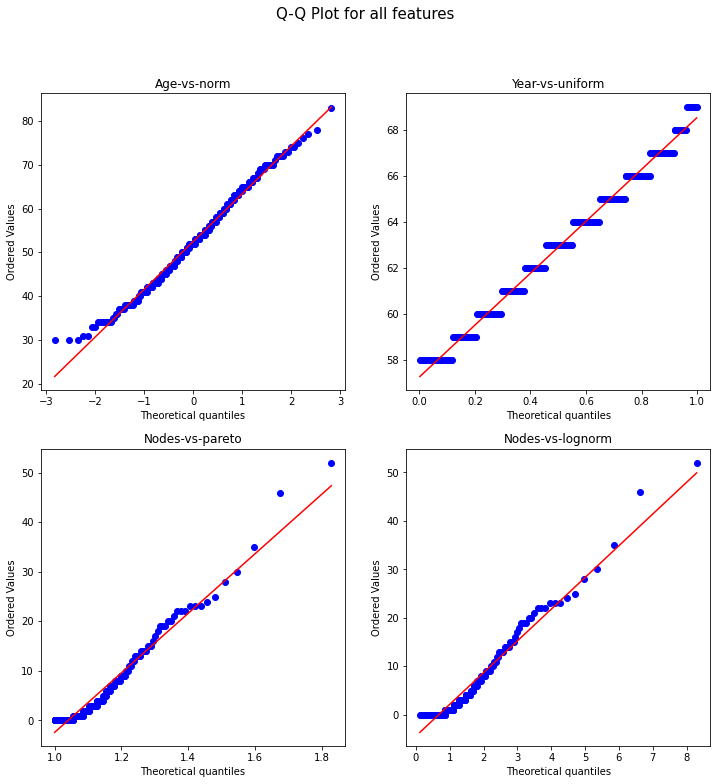

In [15]:
from scipy import stats
f,ax = plt.subplots(2,2, figsize = (12,12))
ax1 = plt.subplot(221)
stats.probplot(data_unique['age'], dist = 'norm', plot= plt)
ax1.set_title('Age-vs-norm', fontsize = 12)

ax1 = plt.subplot(222)
stats.probplot(data_unique['year'], dist = 'uniform', plot= plt)
ax1.set_title('Year-vs-uniform', fontsize = 12)

ax1 = plt.subplot(223)
stats.probplot(data_unique['nodes'], dist = stats.pareto(b=10), plot= plt)
ax1.set_title('Nodes-vs-pareto', fontsize = 12)

ax1 = plt.subplot(224)
stats.probplot(data_unique['nodes'], dist = stats.lognorm(s=0.75), plot= plt)
ax1.set_title('Nodes-vs-lognorm', fontsize = 12)

f.suptitle('Q-Q Plot for all features', fontsize= 15)
plt.show()

Observations:

    1. Age follows normal distribution except for few points at the tails
    2. Year seems like it follows uniform distribution
    3. Nodes follow either pareto or log-normal distribution as both graphs look alike

### KS Test

In [16]:
features  = ['age', 'year', 'nodes']
distributions = ['norm', 'uniform', 'pareto', 'lognorm']

flag = 0
for feature in features:
    for distribution in distributions:
        if distribution == 'pareto':
            p_value = stats.kstest(data_unique[feature], distribution, args= [1])[1]
        elif distribution == 'lognorm':
            p_value = stats.kstest(data_unique[feature], distribution, args =[1])[1]
        else:  
            p_value = stats.kstest(data_unique[feature], distribution)[1]
        print(feature + '----' + distribution + '----' + 'pvalue - ' + str(round(p_value, 3)))
        if p_value > 0.05:
            print(feature + ' follows ' + distribution + ' distribution')
            flag = 1
if flag == 0:
    print('-'*40)
    print('Conclusion:')
    print('No features follow any distribution in the list as per KS-test as p_values are less than 5% significant level')

age----norm----pvalue - 0.0
age----uniform----pvalue - 0.0
age----pareto----pvalue - 0.0
age----lognorm----pvalue - 0.0
year----norm----pvalue - 0.0
year----uniform----pvalue - 0.0
year----pareto----pvalue - 0.0
year----lognorm----pvalue - 0.0
nodes----norm----pvalue - 0.0
nodes----uniform----pvalue - 0.0
nodes----pareto----pvalue - 0.0
nodes----lognorm----pvalue - 0.0
----------------------------------------
Conclusion:
No features follow any distribution in the list as per KS-test as p_values are less than 5% significant level


### AD-test for Normality

In [17]:
stats.anderson(data_unique['age'], 'norm')

AndersonResult(statistic=0.682220590860311, critical_values=array([0.568, 0.647, 0.776, 0.906, 1.077]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Observation:


    1. As per Anderson Darling test, Feature 'age' follows normal distribution at less than 5% significance level. 
    However, it doesn't follow above 10% significance level

### Log Transform / Boxcox Transform on feature Nodes

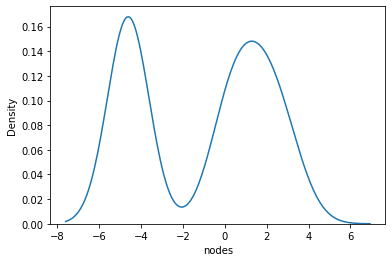

In [18]:
sns.kdeplot(np.log(data_unique['nodes']+0.01))
plt.show()

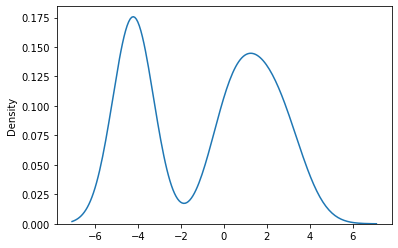

In [19]:
nodes_boxcox = stats.boxcox(data_unique['nodes']+0.01, alpha = 1)[0]
sns.kdeplot(nodes_boxcox)
plt.show()

Observation:

    1. Log or boxcox transformation doesn't help much as transformed plot is not normally distributed

### Distribution of independent features across classes (PDF)

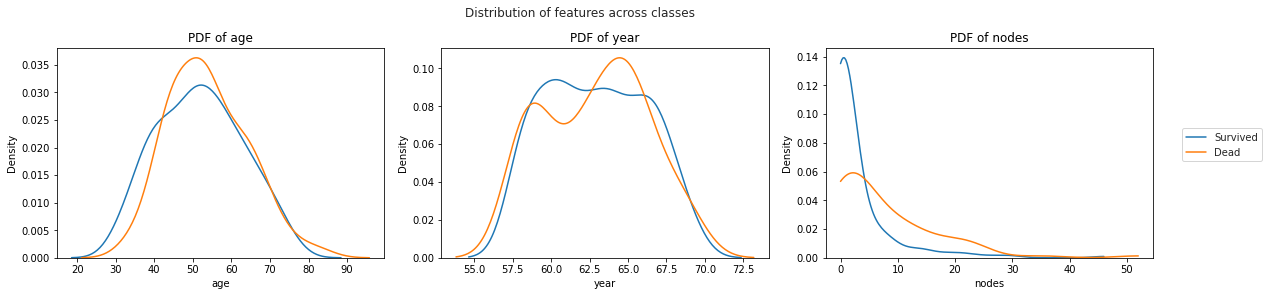

In [20]:
f, axs = plt.subplots(1,3, figsize = (16,4), constrained_layout = True)
sns.set_style('whitegrid')
for idx, feature in enumerate(x.columns):
    cut = 3
    if feature == 'nodes':
        cut = 0
    sns.kdeplot(data = data_unique, x = data_unique[data_unique.status == 'Survived'][feature], ax = axs[idx], cut = cut)\
    .set_title('PDF of ' + feature)
    sns.kdeplot(data = data_unique, x = data_unique[data_unique.status == 'Dead'][feature], ax = axs[idx], cut = cut)
f.suptitle('Distribution of features across classes')
f.legend(labels = ['Survived', 'Dead'], bbox_to_anchor = (1.1,0.6))
plt.show()

Observations:

  Age:

    1. Patients aged below 41 (aprrox) have slightly greater chance of survival
    2. Patients aged between 41 and 60 (approx) have lesser chance of survival 
    3. The difference is not high enough above the age 60 to make a clear statement

  Year:

    1. Patients who got operated below 1958 (aprrox) have slightly lesser chance of survival
    2. Patients who got operated during the period 1959 to 1962 (approx) had slightly higher chance of survival
    3. Patients who got operated during the period 1962 to 1966 (approx) had slightly lower chance of survival
    4. Patients who got operated above 1966 (approx) have slightly higher chance of survival

  Nodes:

    1. Patients with nodes less than or equal to 5 are very likely to survive
    2. On the other hand, patients with nodes greater than 5 are less likely to survive


Note: As univariate analysis doesn't consider dependency of other features on survival chance the above inferences may vary. Also, the data size is small

### Distribution of independent features across classes (CDF)

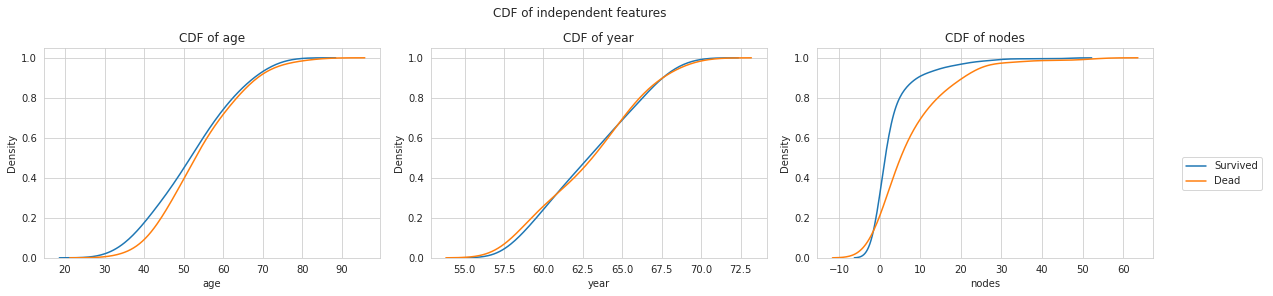

In [21]:
f, axs = plt.subplots(1,3, figsize = (16,4), constrained_layout = True)
for idx, feature in enumerate(x.columns):
    # sns.kdeplot(data = data_unique, x = feature, cumulative = True, ax = axs[idx])
    sns.kdeplot(data = data_unique, x = data_unique[data_unique.status == 'Survived'][feature], cumulative = True, ax=axs[idx])\
    .set_title('CDF of ' + feature)
    sns.kdeplot(data = data_unique, x = data_unique[data_unique.status == 'Dead'][feature], cumulative = True, ax = axs[idx])
f.legend(['Survived', 'Dead'], bbox_to_anchor = (1.1, 0.5))
f.suptitle('CDF of independent features')
plt.show()

Observations:

    1. About 45% of patients who survived and about 40% of patients who did not survive are aged below 50. 
       So there's slightly better chance (5% aprrox) of survival if operated younger
    2. Year has no significant predicting power as the two distributions overlap almost
    3. About 80% of patients who survived and about 50% of patients who did not survive had nodes <=5. 
       So, there's 30% more chance of survival if nodes <=5

### Boxplot of independent features across classes

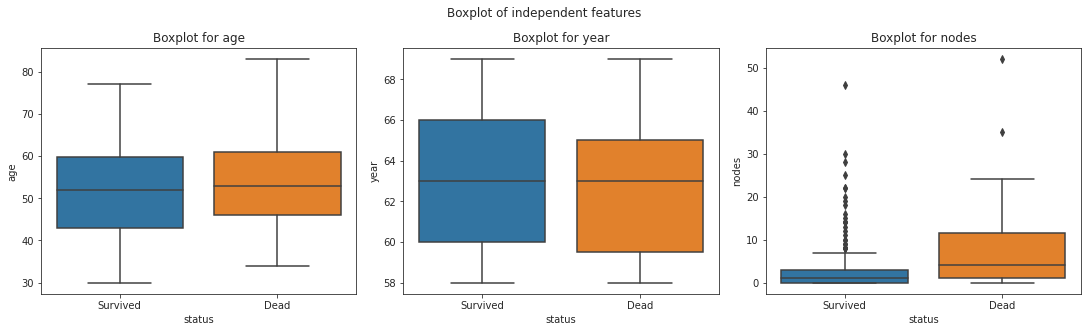

In [22]:
sns.set_style('ticks')
f, axs = plt.subplots(1,3, figsize = (15,4.5), constrained_layout =True)
for idx, feature in enumerate(x.columns):
    sns.boxplot(data= data_unique, x = 'status', y = feature, ax = axs[idx]).set_title('Boxplot for ' + feature)
f.suptitle('Boxplot of independent features')
plt.show()

Observations:

    1. 50th percentile (median) is almost same for both the classes in age and year boxplots. 
    2. 75th percentile of patients who survived had the nodes <=5 and threshold being 7 (aprrox) above which are cases with extremities
    3. The spread is greater for patients who did not survive and its 75th percentile is 11 nodes (approx)
    4. 50th percentile (median) is 1 for patients who survived while it is 6 (approx) for patients who did not survive

### Violinplot of independent features across classes

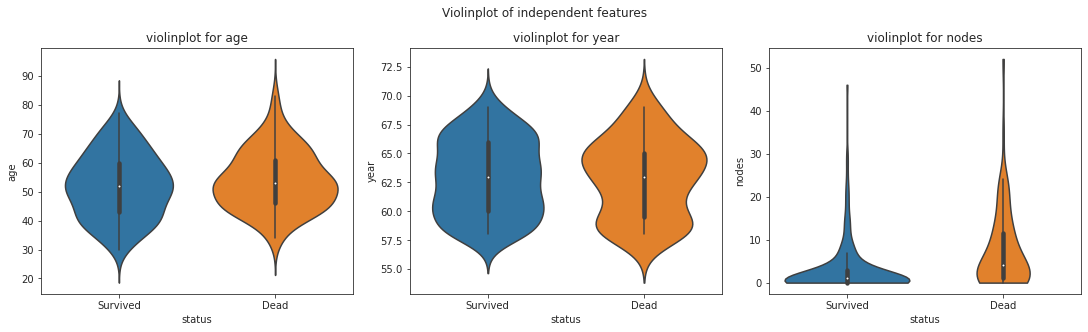

In [23]:
f, axs = plt.subplots(1,3, figsize = (15,4.5), constrained_layout =True)
for idx, feature in enumerate(x.columns):
    cut = 3
    if feature == 'nodes':
        cut = 0
    sns.violinplot(data= data_unique, x = 'status', y = feature, ax = axs[idx], cut = cut).set_title('violinplot for ' +feature)
f.suptitle('Violinplot of independent features')
plt.show()

Observations:

    1. Patients operated after 1966 have slightly higher chance of survival
    2. The density of patients who survived is more below the nodes <= 1 and they are more likely to survive

### Swarmplot of independent features across classes

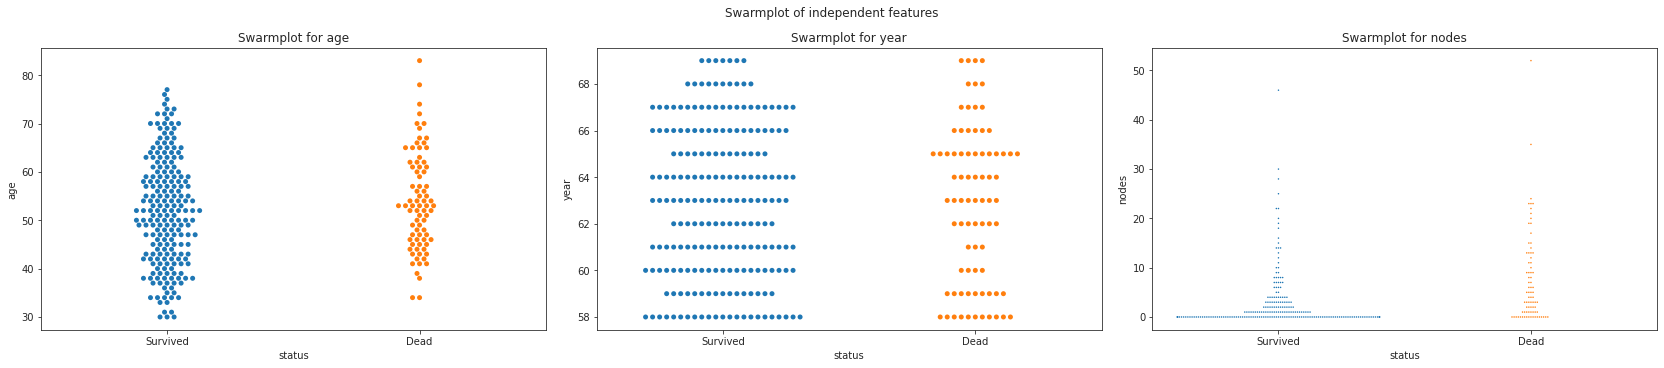

In [24]:
f, axs = plt.subplots(1,3, figsize = (23,5), constrained_layout =True)
for idx, feature in enumerate(x.columns):
    size = 5
    if feature == 'nodes':
        size = 1.5
    sns.swarmplot(data= data_unique, x = 'status', y = feature, ax = axs[idx], size =size).set_title('Swarmplot for ' +feature)
f.suptitle('Swarmplot of independent features')
plt.show()

Observations:

    1. Though we can make some inferences based on the above plots, that would not give us a clear picture as data is imbalanced
    2. More number of observations have nodes 0

## **3. Bi-Variate Analysis (Pairplot)**

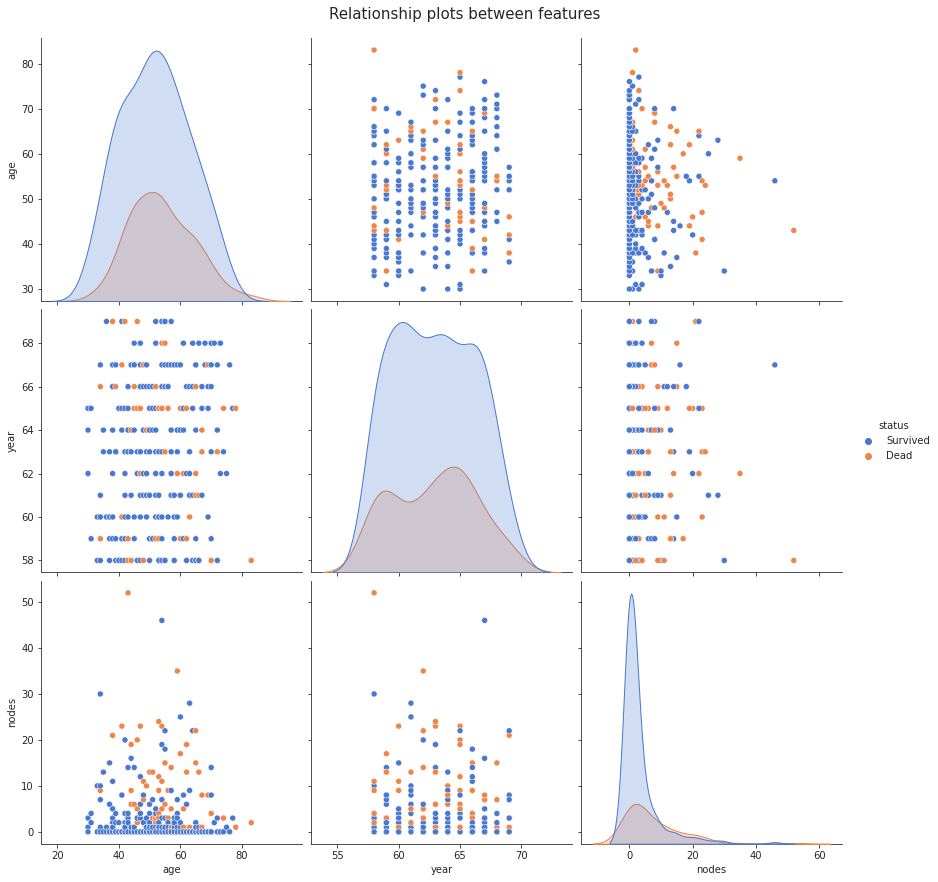

In [25]:
g = sns.pairplot(data_unique, hue= 'status', palette = 'muted', height = 4)
g.fig.suptitle('Relationship plots between features', fontsize = 15, y = 1.02)

plt.show()

Observations:

      Age vs Year
      1. The points are not well separated to make any inference

      Age vs Nodes
      1. Patients who survived are densely populated <= 5 nodes across all ages
      2. Patients who did not survive are scattered >= 5 nodes across all ages
      3. Though there is some overlapping we can see better separation compared to other plots. 
         However, simple model (using if else) will be weak based on this criteria alone

      Year vs Nodes
      1. There is no clear distinction that can be made from this graph

## **4. Correlation Matrix**

In [26]:
data_unique_mapped = data_unique.copy()
data_unique_mapped['status'] = data_unique['status'].map({'Survived': 1, 'Dead': 0})
round(data_unique_mapped.corr(), 3)

,age,year,nodes,status
age,1.000,0.088,-0.061,-0.083
year,0.088,1.000,-0.005,0.006
nodes,-0.061,-0.005,1.000,-0.276
status,-0.083,0.006,-0.276,1.000


In [27]:
round(data_unique_mapped.corr(), 3)['status']

age      -0.083
year      0.006
nodes    -0.276
status    1.000
Name: status, dtype: float64

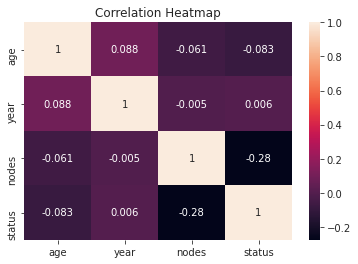

In [28]:
sns.heatmap(round(data_unique_mapped.corr(), 3), annot= True).set_title('Correlation Heatmap')
plt.show()

Observations:

    1. We can see that status is dependent on features in the order nodes > age > year and hence the predicting power
    2. As the number of nodes or age of patient increases, survival chance decreases in the magnitude of correlation co-eficient
    3. As the correlation co-efficients for independent features is close to zero, there is no significant correlation between features

# **Key Takeaways**

    1. The data is imbalanced. About 72.6% of observations (after removal of duplicates) are for patients who survived
    2. 50% of the observations are in the age group of 44-60 years of age(16 years)
    3. About 50% of obeservations have 0 or 1 node
    4. Age roughly has normal distribution
    5. Year is approximately follows uniform distribution and is between 1958 and 1969
    6. Distribution of nodes follows power-law. Hence, it has pareto distribution
    7. Nodes is highly densed from 0 to 5 (About 76% of observations)
    8. Patients aged below 41 (aprrox) have slightly greater chance of survival
    9. Patients with nodes less than or equal to 5 are very likely to survive
    10. We can see somewhat better separation between the classes in plot Age vs Nodes compared to other plots
    11. The class is dependent on features in the order nodes > age > year and hence the predicting power
    12. As the number of nodes or age of patient increases, survival chance decreases in the magnitude of correlation co-eficient
    13. As the correlation co-efficients for independent features is close to zero, there is no significant correlation between features